In [1]:
# Set up environment
%matplotlib inline
import matplotlib.pyplot as plt
from Bio.PDB import *
import re
import ProteinPersistence

In [2]:
def Compute_PDB_PersistenceDiagrams(filename):
    # Load an example PDB file using BioPython
    p = PDBParser()
    structure = p.get_structure('',filename)
    # Create a list of entries [x, y, z, r] representing (x,y,z) coordinates of each atom
    # and van der Waals radius of that atom
    def atom_shortname(s):
        return s[re.search("[A-Z]", s).start()]

    def vanderWaalsRadius(atom_name):
        """ 
        Return van der Waals radius associated with 'atom_name'
        """
        return { "H" : 1.2, "C" : 1.7 , "N" : 1.55, "O" : 1.52, "S" : 1.8}[atom_name];
    xyzr_list = [ list(atom.get_coord()) + [vanderWaalsRadius(atom_shortname(atom.get_name()))] \
                  for atom in structure.get_atoms() ]
    # Compute 
    return ProteinPersistence.pdb2persistence(xyzr_list)

In [3]:
def DisplayDiagrams(diagrams):
    fig = plt.figure(figsize=(20, 6))
    for d in [0,1,2]:
        x_vals = [ item[0] for item in diagrams[d]]
        y_vals = [ item[1] for item in diagrams[d]]
        ax = fig.add_subplot(1, 3, d+1)
        plt.scatter(x_vals, y_vals)

In [4]:
diagrams = Compute_PDB_PersistenceDiagrams('example.pdb')

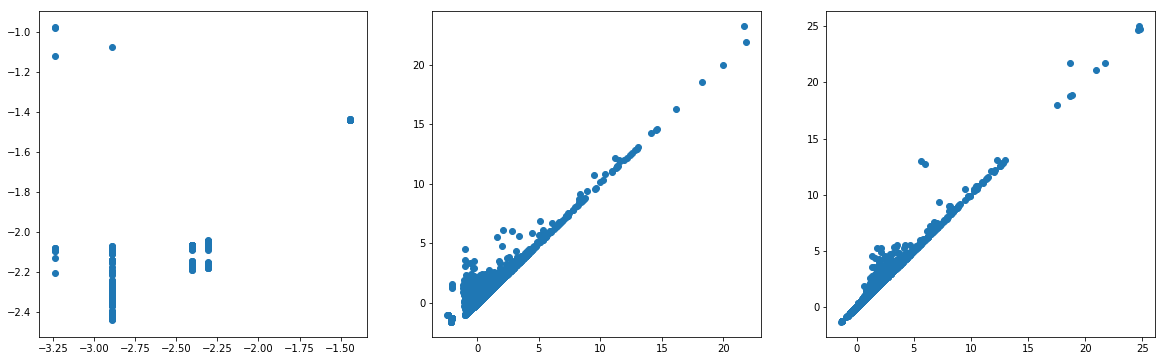

In [5]:
DisplayDiagrams(diagrams)